In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
ti = np.array([0, 7, 14, 21, 28], dtype=float)  
I = np.array([117, 902, 4838, 18610, 52574], dtype=float)

lnI = np.log(I)
n = len(ti)
t_mean = np.mean(ti)
lnI_mean = np.mean(lnI)

In [28]:
#r = np.sum((ti - t_mean) * (lnI - lnI_mean)) / np.sum((ti - t_mean)**2)
r = (np.sum(ti * lnI) - n * t_mean * lnI_mean) / (np.sum(ti**2) - n * t_mean**2)
a = lnI_mean - r * t_mean


In [29]:
I_fit = np.exp(a + r * ti)

gamma = 0.1
beta = r + gamma

In [30]:
print(f"Fitted growth rate r = {r:.5f} per day")
print(f"Intercept a = {a:.5f} (so I0 = exp(a) = {np.exp(a):.1f})")
print(f"With gamma={gamma:.2f}/day → beta = {beta:.5f}/day")

Fitted growth rate r = 0.21775 per day
Intercept a = 5.10201 (so I0 = exp(a) = 164.4)
With gamma=0.10/day → beta = 0.31775/day


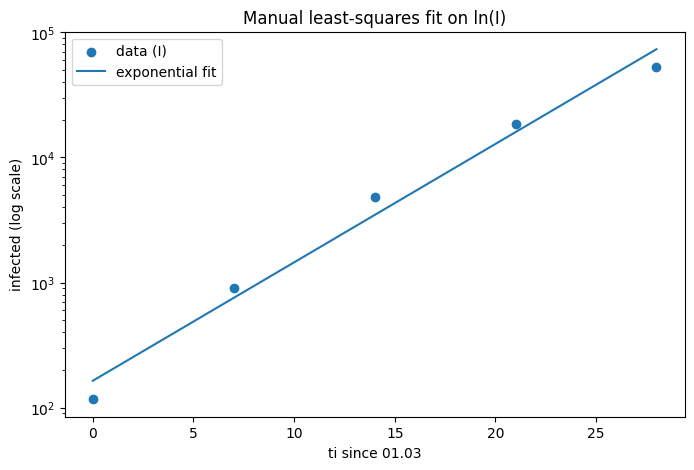

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(ti, I, label="data (I)", zorder=3)
plt.plot(ti, I_fit, label="exponential fit", zorder=2)
plt.yscale('log')          
plt.xlabel("ti since 01.03")
plt.ylabel("infected (log scale)")
plt.title("Manual least-squares fit on ln(I)")
plt.legend()
plt.show()


Using linregress: r = 0.21775, a = 5.10201


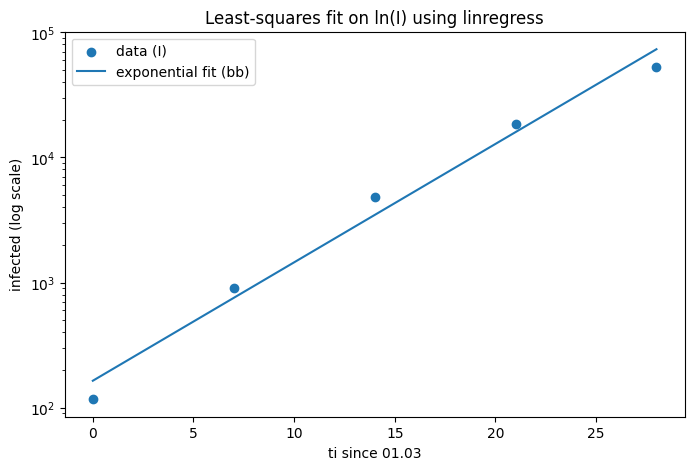

In [32]:
# find a and r using black-box functions
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(ti, lnI)
print(f"Using linregress: r = {slope:.5f}, a = {intercept:.5f}")

I_fit_bb = np.exp(intercept + slope * ti)
plt.figure(figsize=(8,5))
plt.scatter(ti, I, label="data (I)", zorder=3)
plt.plot(ti, I_fit_bb, label="exponential fit (bb)", zorder=2)
plt.yscale('log')
plt.xlabel("ti since 01.03")
plt.ylabel("infected (log scale)")
plt.title("Least-squares fit on ln(I) using linregress")
plt.legend()
plt.show()



Using curve_fit: r = 0.15742, a = 6.46615


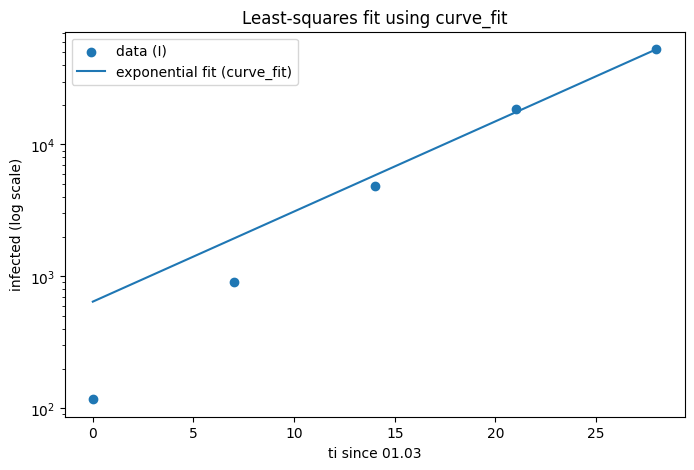

In [33]:
# fit some other model
from scipy.optimize import curve_fit
def model(t, a, r):
    return np.exp(a + r * t)
params, covariance = curve_fit(model, ti, I, p0=(a, r))
a_fit, r_fit = params
print(f"Using curve_fit: r = {r_fit:.5f}, a = {a_fit:.5f}")

I_fit2 = model(ti, a_fit, r_fit)
plt.figure(figsize=(8,5))
plt.scatter(ti, I, label="data (I)", zorder=3)
plt.plot(ti, I_fit2, label="exponential fit (curve_fit)", zorder=2)
plt.yscale('log')
plt.xlabel("ti since 01.03")
plt.ylabel("infected (log scale)")
plt.title("Least-squares fit using curve_fit")
plt.legend()
plt.show()

